# 优化方法（Optimization Methods）

# 牛顿-拉普森法（Newton-Rhapson Method）

这个方法是用来寻找一个函数的零点的。（其实也就是用来解 f(x)=0  这个方程求根的方法，硕士生的 数值分析 课程里面就会讲到这个方法以及相关的内容。）

## 样例：最大似然估计（Maximum Likelihood Estimation，缩写为 MLE）

回忆一下最大似然估计（MLE）,这个过程中我们要对一个参数值 $\theta$ 进行估计，使得这个参数能够让一个对数似然概率函数（log-likelihood function） $\ell(X;\theta)$取最大值。 设 $X_1,...,X_n$ 是一个独立同分布集合（iid set），集合中的元素为随机变量，服从概率分布函数（Probability Distribution Function，缩写为 PDF $f(x;\theta)$, 其中的 $\theta \in \mathbb{R}^k$ 是一个参数。这个似然函数就是：


$$L(X;\theta) = \prod_{i=1}^n f(X_i;\theta)$$


我们想要得到的是能够让函数值 $L$ 最大的$\theta$。这个很好实现，可以先对 $L$ 求关于 $\theta$ 的一阶导数（first derivative，或梯度 gradient），设导数值为零，然后求得对应的 $\theta$，就是我们要找的了。然而，如果我们先对函数 $L$ 取对数得到 $\log(L)$，然后去求解就更容易一些了，由于函数 $L$ 是几个密度函数（densities）的乘积（product），所以求对数之后就把累乘转换成了累加。由于对数函数是一个单调递增函数，所以使得对数函数 $\log(L)$ 最大化的 $\theta$ 必然也能使 $L$ 取最大值 。

$$
\begin{eqnarray*}
\ell(X;\theta) &=& \log(L(X;\theta)) \\\\
&=& \log\left(\prod_{i=1}^n f(X_i;\theta)\right)\\\\
&=&\sum_{i=1}^n \log(f(X_i;\theta)
\end{eqnarray*}
$$

$$
\begin{eqnarray*}
\frac{\partial\ell}{\partial \theta} &=& \frac{\partial}{\partial \theta} \left(\sum_{i=1}^n\log(f(X_i;\theta)\right)\\\\
&=& \sum_{i=1}^n \frac{\partial\log(f(X_i;\theta)}{\partial \theta}
\end{eqnarray*}
$$

现在我们需要解出来上面这个函数等于零的点。这就引出来了：

## 牛顿法

我们的目标是要找出能够使得可微函数（differentiable function）$g(\theta)=0$ 的$\theta$ 值。


思路：先猜测一个，$\theta_0$。用 $\tilde{\theta}$ 来表示对应$g(\theta)$的真实$\theta$值，另外设 $h = \tilde{\theta} - \theta_0$。于是则有：

$$
\begin{eqnarray*}
g(\tilde{\theta}) &=& 0 \\\\
&=&g(\theta_0 + h) \\\\
&\approx& g(\theta_0) + hg'(\theta_0)
\end{eqnarray*}
$$

这也就表明： 

$$ h\approx \frac{g(\theta_0)}{g'(\theta_0)}$$

所以则有：

$$\tilde{\theta}\approx \theta_0 - \frac{g(\theta_0)}{g'(\theta_0)}$$


然后，我们再进行一下近似：

$$\theta_1 = \theta_0 - \frac{g(\theta_0)}{g'(\theta_0)}$$


这样就构建了一个迭代过程了：

$$\theta_n = \theta_{n-1} - \frac{g(\theta_{n-1})}{g'(\theta_{n-1})}$$

#### 样例

设 $$g(x) = \frac{x^3-2x+7}{x^4+2}$$


这个函数的图形为：

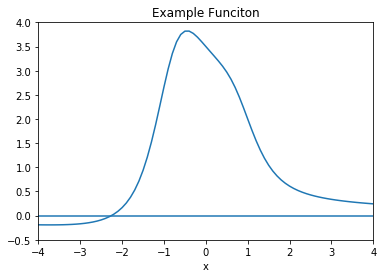

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Example Funciton')
plt.show()

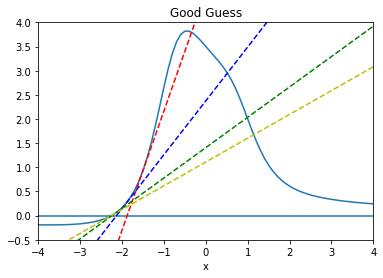

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Good Guess')
t = np.arange(-5, 5., 0.1)

x0=-1.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)
   
    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge=0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()



从函数图像来看，零点大概就在 -2 附近。我们就采取初始假设值为 $$x=-1.5$$

根据上面的代码运算和函数图像可以发现，刚刚这个猜测很不错，算法很快就收敛了。

In [17]:
funval

-0.009801328519377537

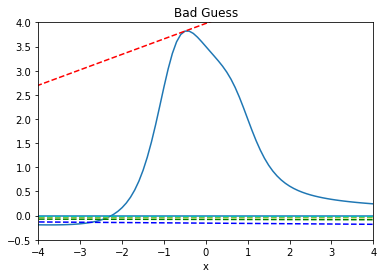

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Bad Guess')
t = np.arange(-5, 5., 0.1)

x0=-0.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)
   
    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()


上面的代码和图片展示的是另外一种情况，其中采用的初始值是$$x=-0.5$$，这样后来就跑到水平线上面去了，算法就没能够收敛。


### 收敛速率（Convergence Rate）

好消息就是，如果算法收敛，其收敛速度很快：

设 $x_k \; \rightarrow \; x^*$，且 $g'(x^*) \neq 0$，则可以写成：

$$x_k = x^* + \epsilon_k$$

然后在 $x^*$ 的位置展开 $g$ ：

$$g(x_k) = g(x^*) + g'(x^*)\epsilon_k + \frac12 g''(x^*)\epsilon_k^2 + ...$$
$$g'(x_k)=g'(x^*) + g''(x^*)\epsilon_k$$

则有了：


\begin{eqnarray}
\epsilon_{k+1} &=& \epsilon_k + \left(x_{k-1-x_k}\right)\\
&=& \epsilon_k -\frac{g(x_k)}{g'(x_k)}\\
&\approx & \frac{g'(x^*)\epsilon_k + \frac12g''(x^*)\epsilon_k^2}{g'(x^*)+g''(x^*)\epsilon_k}\\
&\approx & \frac{g''(x^*)}{2g'(x^*)}\epsilon_k^2
\end{eqnarray}